In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()
 
for fn in uploaded.keys():
    print('you uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv
you uploaded file "winequality-red.csv" with length 84199 bytes
you uploaded file "winequality-white.csv" with length 264426 bytes


#Exploring,visualizing and preprocessing data

In [ ]:
train_white_df = pd.read_csv('winequality-white.csv',sep=';')
display(train_white_df)
train_red_df = pd.read_csv('winequality-red.csv',sep=';')
display(train_red_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(train_white_df.dtypes)
print(train_red_df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


$\text{all values are either float or int}$

In [ ]:
#checking for unique and null values from datasets red wine and white wine

print('\033[1m' + "For White wine :" +'\033[0m')
for value in train_white_df.columns.values :
    list_vals = pd.unique(train_white_df[value])
    print(value + ' is of type ' + str(train_white_df[value].dtypes) + ', has ' + str(len(list_vals)) + ' unique values , and ' + str(train_white_df.isna().sum().sum()) + ' null values')
    if len(list_vals) < 10 :
        list_str =''
        for n_value in range(0,len(list_vals)) :
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('these are : ' + list_str[0:len(list_str)])

print('\033[1m' + "For Red wine :" +'\033[0m')
for value in train_red_df.columns.values :
    list_vals = pd.unique(train_red_df[value])
    print(value + ' is of type ' + str(train_red_df[value].dtypes) + ', has ' + str(len(list_vals)) + ' unique values , and ' + str(train_red_df.isna().sum().sum()) + ' null values')
    if len(list_vals) < 10 :
        list_str =''
        for n_value in range(0,len(list_vals)) :
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('these are : ' + list_str[0:len(list_str)])


For White wine :
fixed acidity is of type float64, has 68 unique values , and 0 null values
volatile acidity is of type float64, has 125 unique values , and 0 null values
citric acid is of type float64, has 87 unique values , and 0 null values
residual sugar is of type float64, has 310 unique values , and 0 null values
chlorides is of type float64, has 160 unique values , and 0 null values
free sulfur dioxide is of type float64, has 132 unique values , and 0 null values
total sulfur dioxide is of type float64, has 251 unique values , and 0 null values
density is of type float64, has 890 unique values , and 0 null values
pH is of type float64, has 103 unique values , and 0 null values
sulphates is of type float64, has 79 unique values , and 0 null values
alcohol is of type float64, has 103 unique values , and 0 null values
quality is of type int64, has 7 unique values , and 0 null values
these are : 6, 5, 7, 8, 4, 3, 9, 
For Red wine :
fixed acidity is of type float64, has 96 unique val

$\text{No column in red and white wine dataset contains any null values !}$

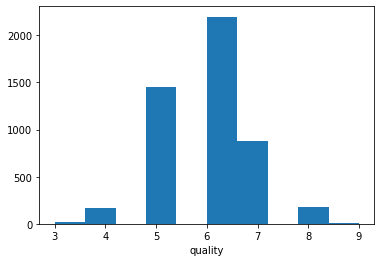

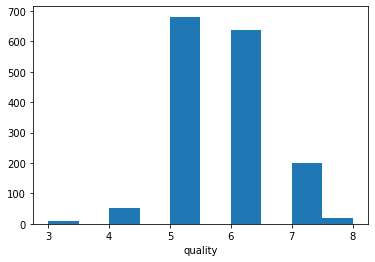

In [ ]:
#visualizing only discrete data in white wines dataset
for col in train_white_df.columns.values:
    if (train_white_df[col].dtypes == 'int64') | (train_white_df[col].dtypes == 'object') :
        plt.hist(train_white_df[col])
        plt.xlabel(col)
        plt.show()
#visualizing only discrete data in red wine dataset
for col in train_red_df.columns.values:
    if (train_red_df[col].dtypes == 'int64') | (train_red_df[col].dtypes == 'object') :
        plt.hist(train_red_df[col])
        plt.xlabel(col)
        plt.show()

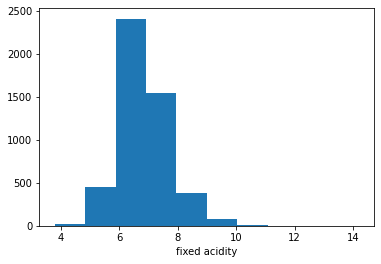

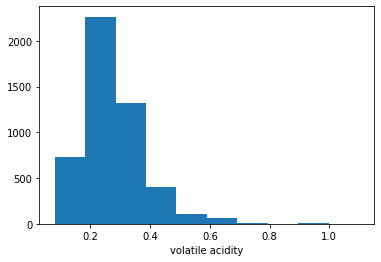

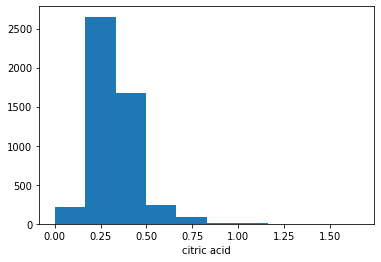

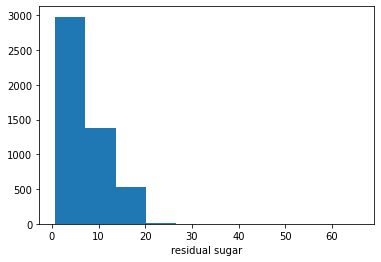

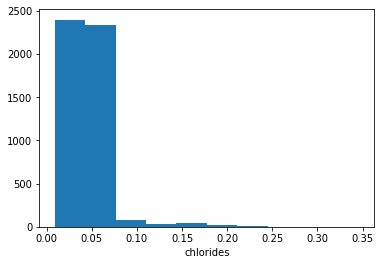

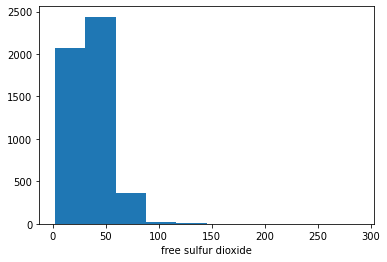

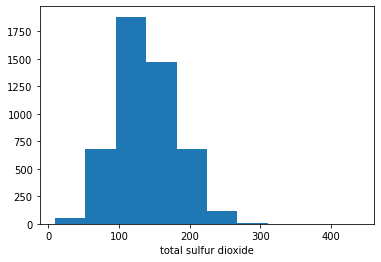

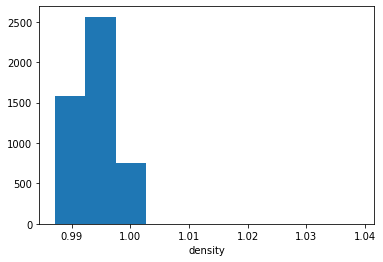

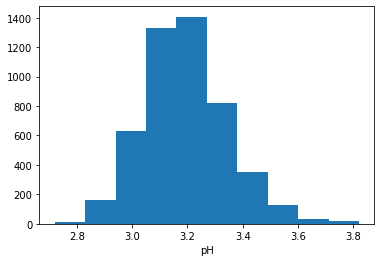

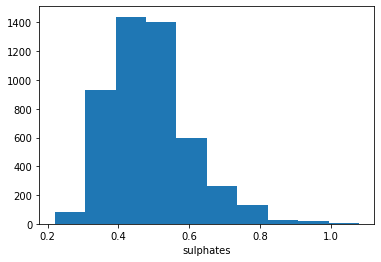

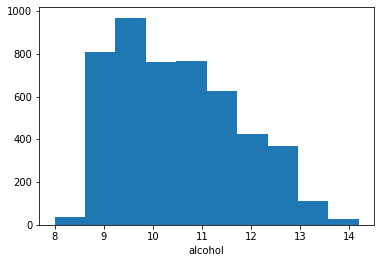

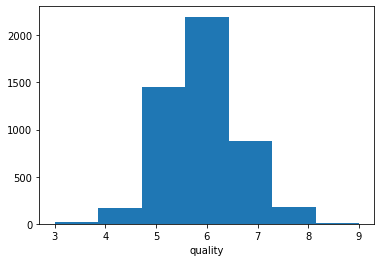

In [ ]:
#visualizing continuous as well discrete data
for col in train_white_df.columns.values:
    if (train_white_df[col].dtypes == 'int64') | (train_white_df[col].dtypes == 'float64') :
        plt.hist(train_white_df[col],10 if len(pd.unique(train_white_df[col])) > 20 else len(pd.unique(train_white_df[col])))
        plt.xlabel(col)
        plt.show()

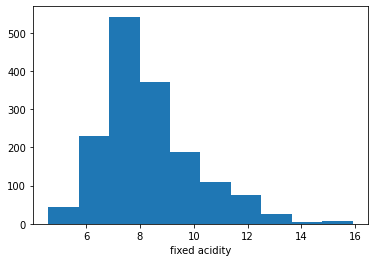

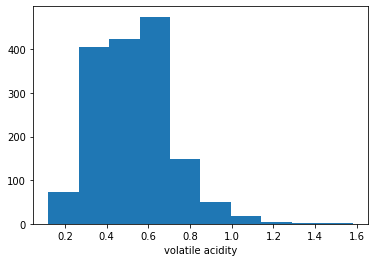

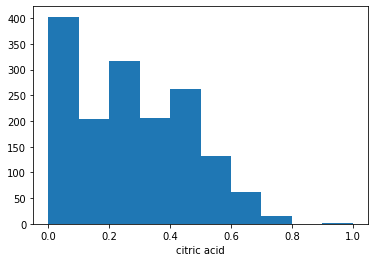

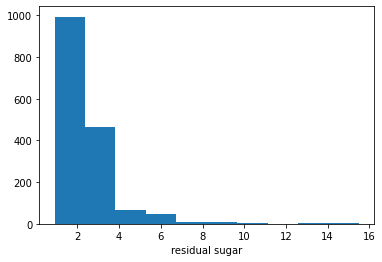

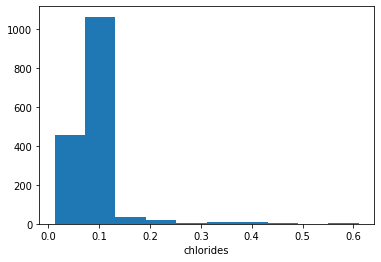

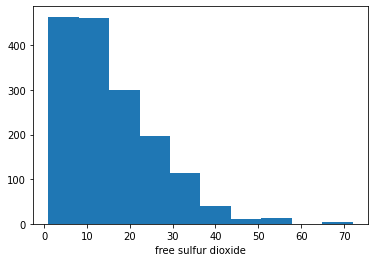

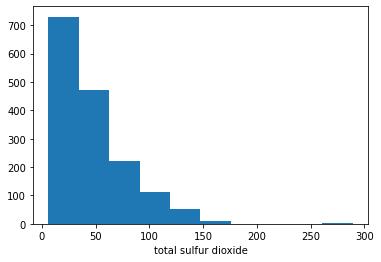

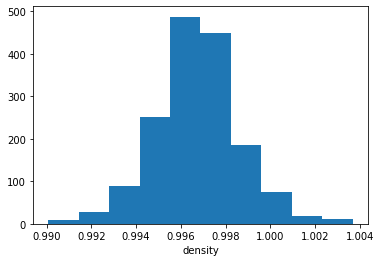

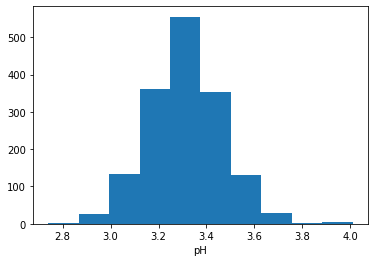

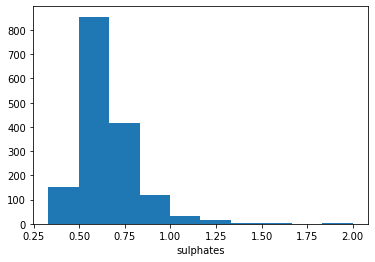

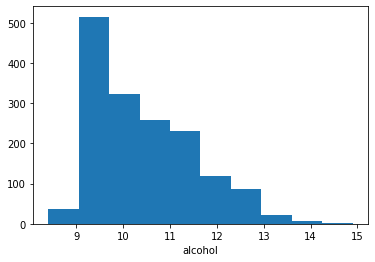

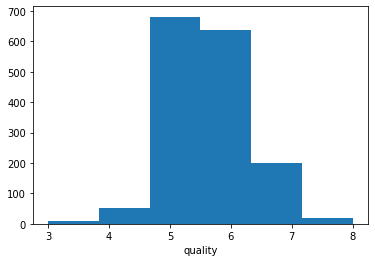

In [ ]:
for col in train_red_df.columns.values: #visualising int and float data for red wine
    if (train_red_df[col].dtypes == 'int64') | (train_red_df[col].dtypes == 'float64') :
        plt.hist(train_red_df[col],10 if len(pd.unique(train_red_df[col])) > 20 else len(pd.unique(train_red_df[col])))
        plt.xlabel(col)
        plt.show()

$\text{For red wine ph, citric acid, density is well spread}$


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a171ab7b8>,
      dtype=object)

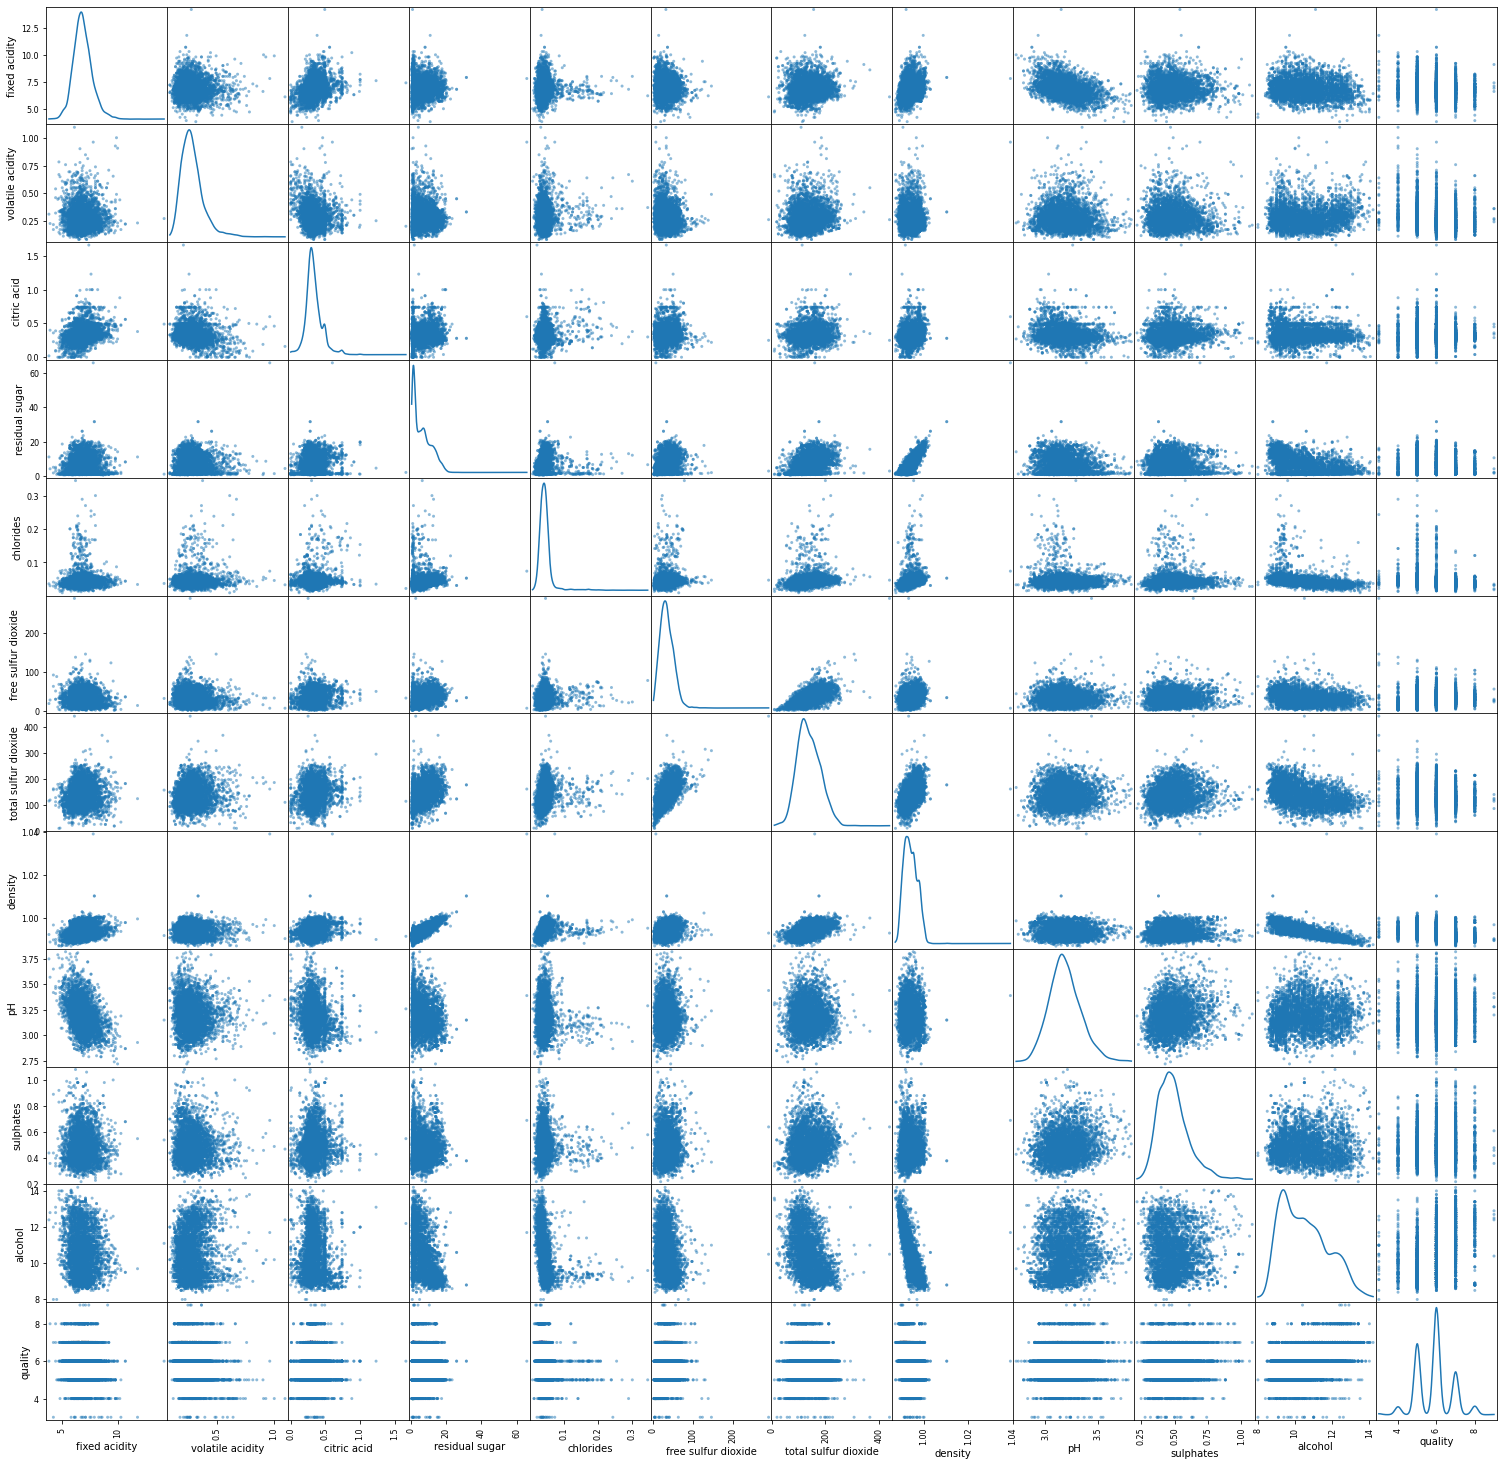

In [ ]:
#scatter matrix for white wine
scatter_matrix(train_white_df , alpha =0.5 ,figsize= (26,26) , diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a171d84e0>,
      dtype=object)

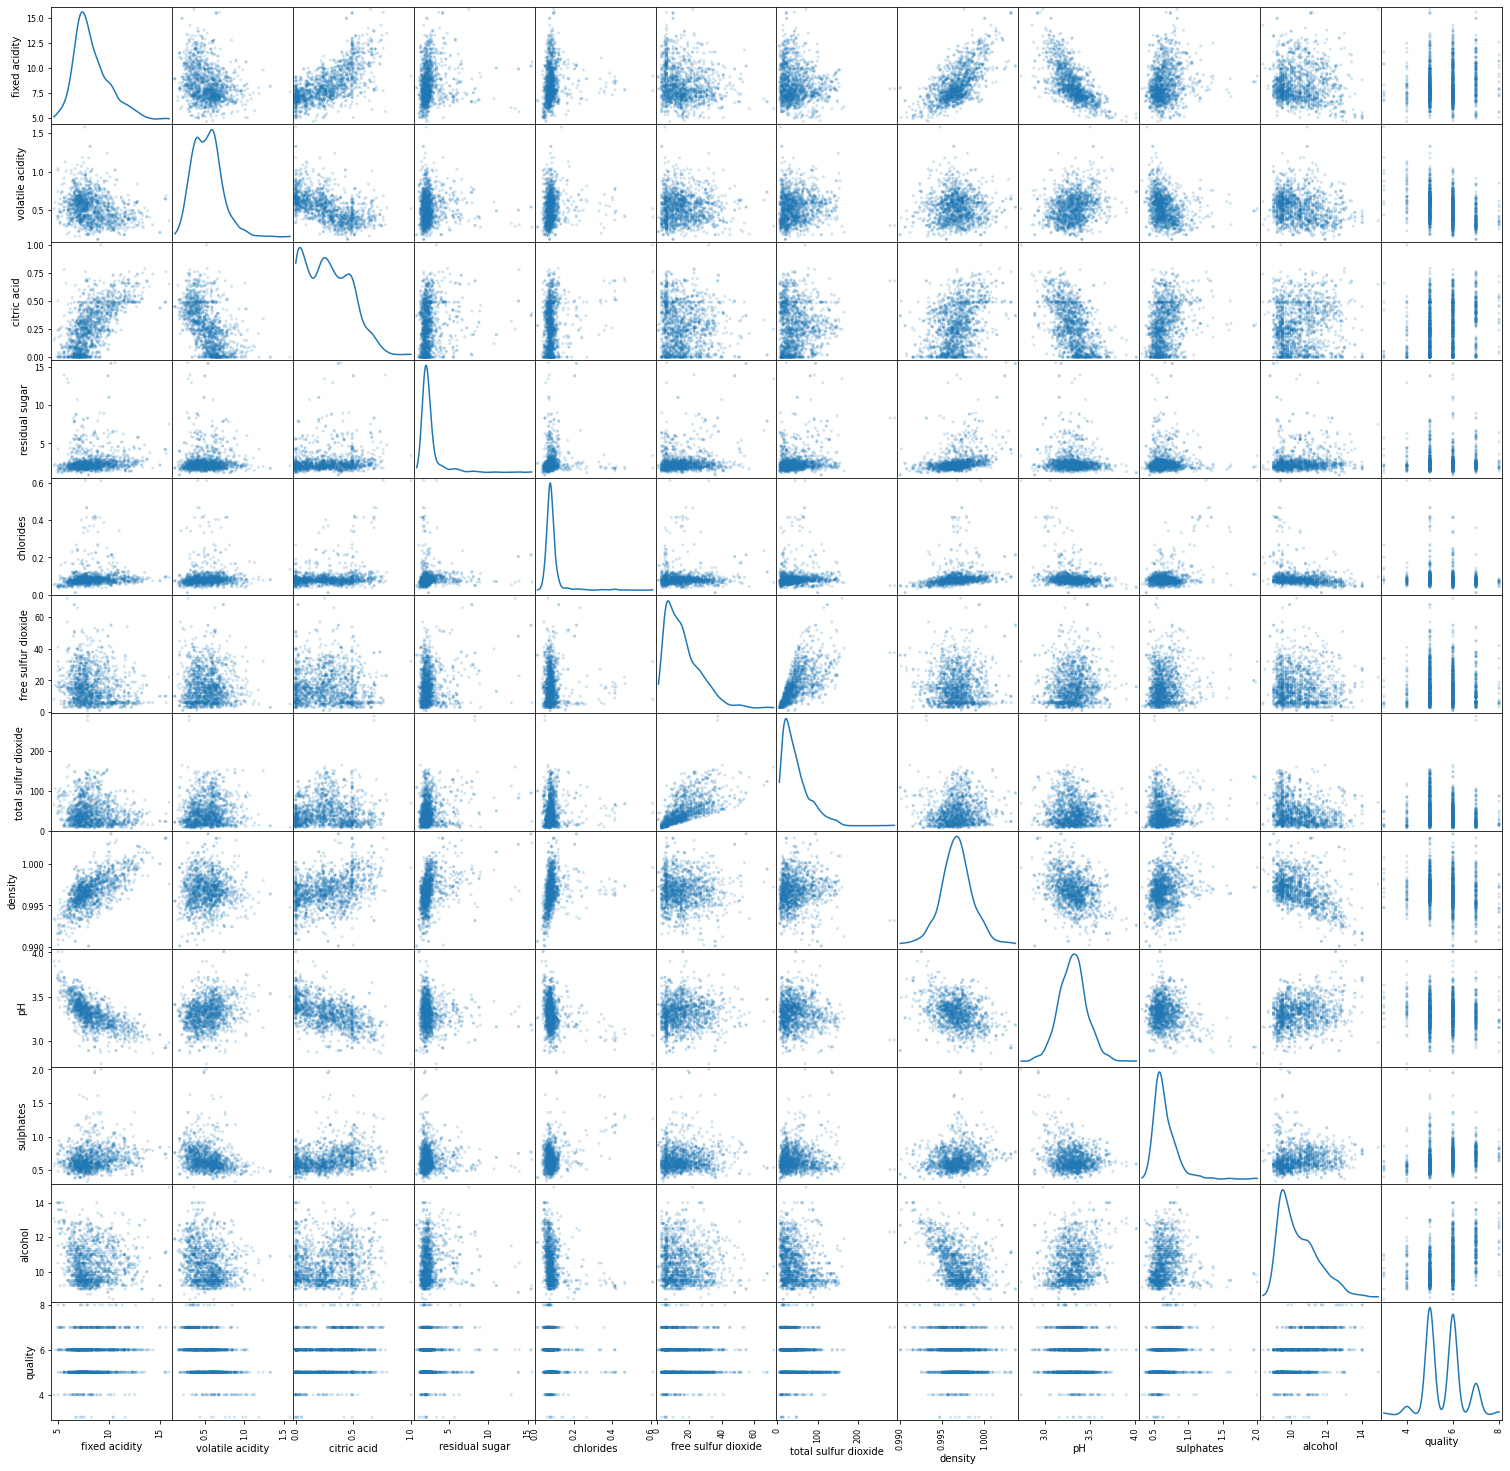

In [ ]:
#scatter matrix for red wine
scatter_matrix(train_red_df , alpha =0.2 ,figsize= (26,26) , diagonal = 'kde')

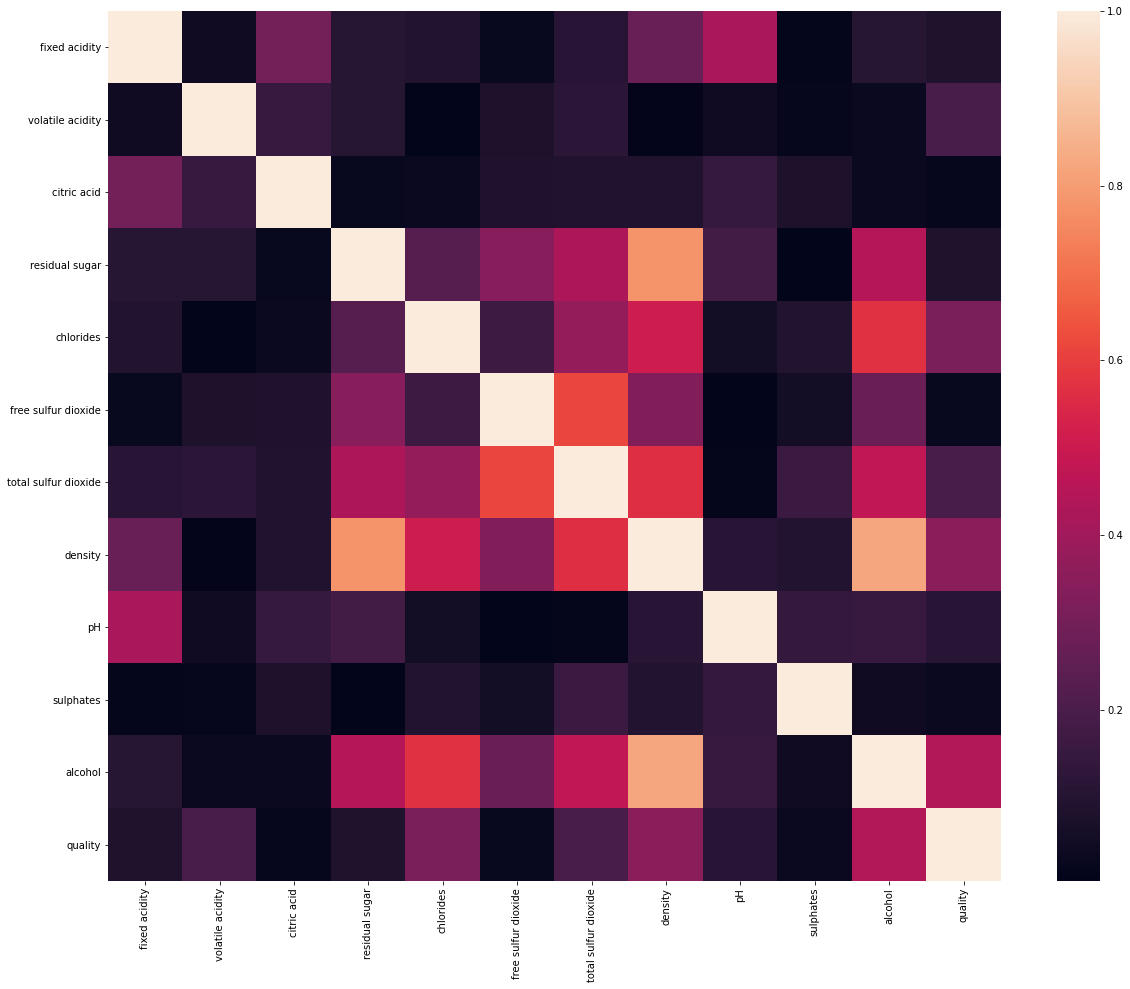

In [ ]:
#heatmap using spearman correlation
corrMatrix = train_white_df.corr(method = 'spearman')
fig, ax =plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()


from heatmap, free sulphur dioxide and total sulphur dioxide are somewhat correlated but correlation value is low (=0.6),density and residual sugar is correlated (< 0.80) and hence kept.

<function matplotlib.pyplot.show>

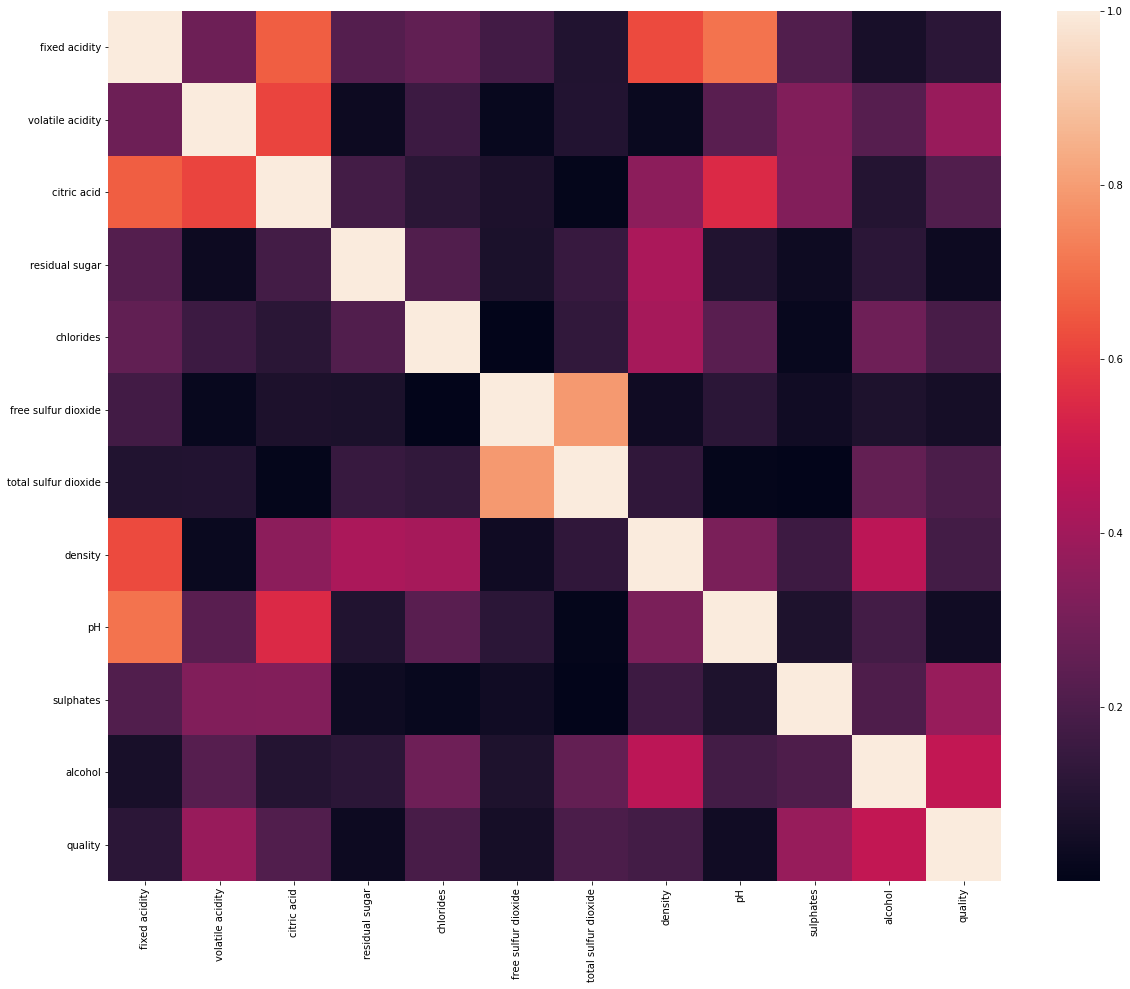

In [ ]:
#heatmap for red wine
corrMatrix2 = train_red_df.corr(method='spearman')
fig = plt.figure(figsize=(20,16))
sns.heatmap(abs(corrMatrix2),annot=False)
plt.show

total sulphuric acid and free sulphur dioxide are correlated and one of them can be dropped.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

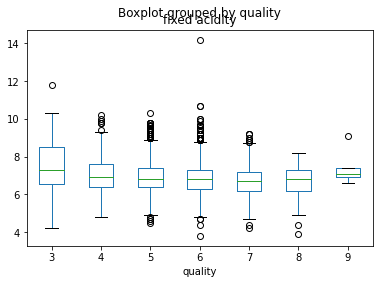

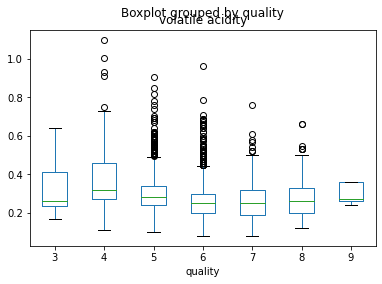

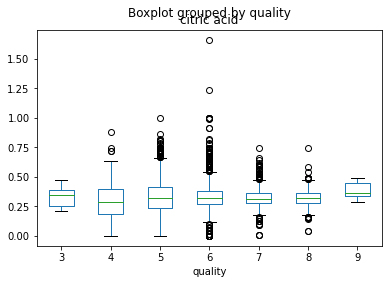

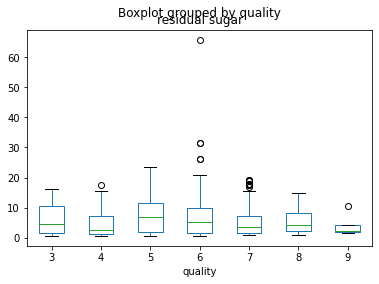

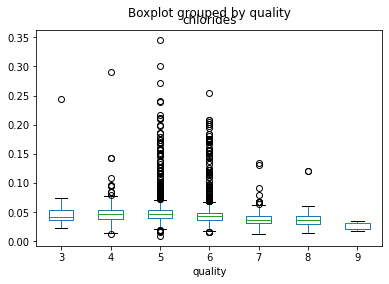

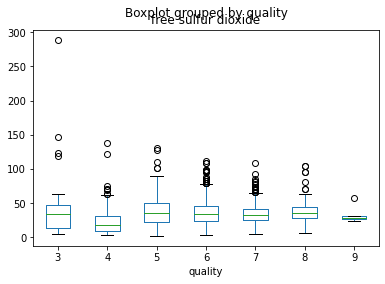

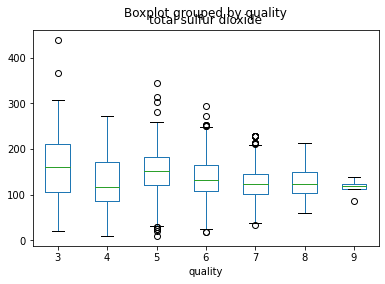

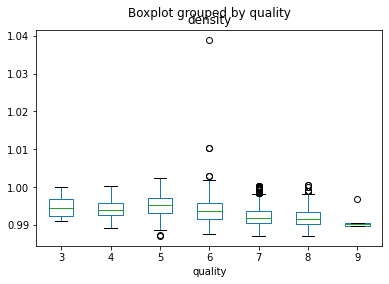

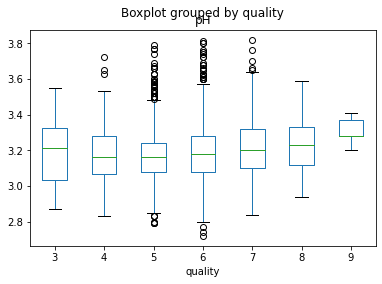

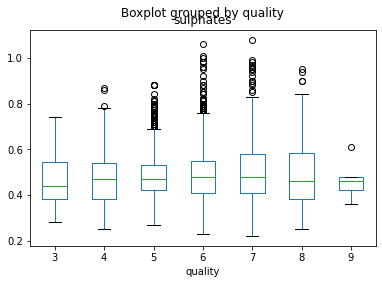

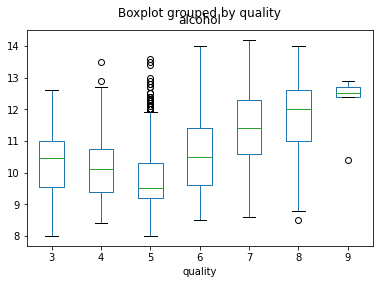

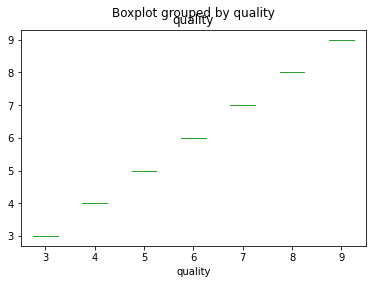

In [ ]:
#boxplot for visualizing white wine
for col in train_white_df.columns.values :
    train_white_df.boxplot(by ='quality' ,column =col,grid = False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

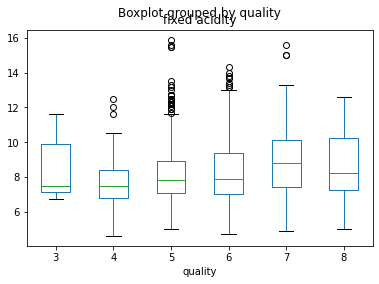

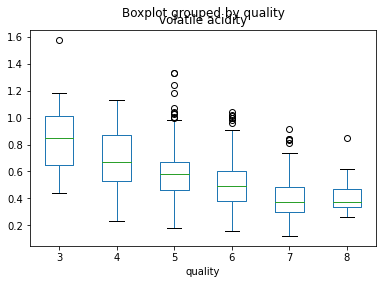

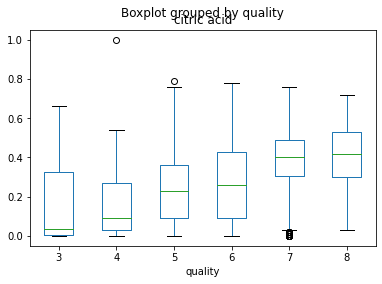

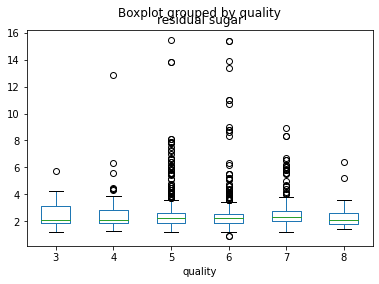

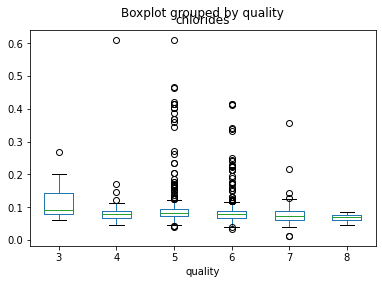

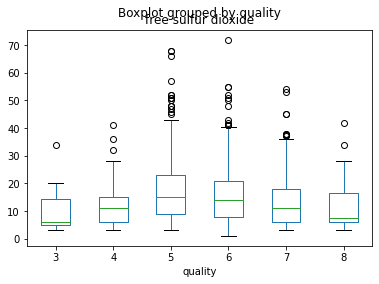

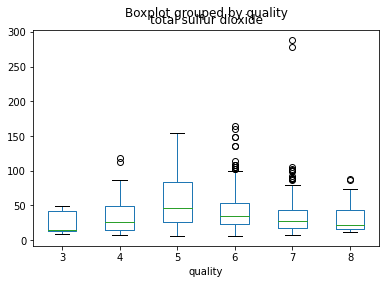

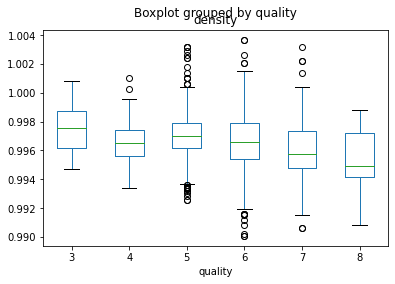

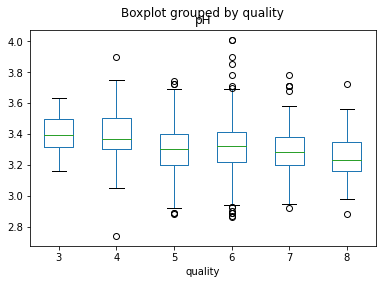

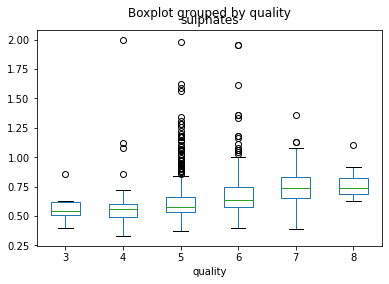

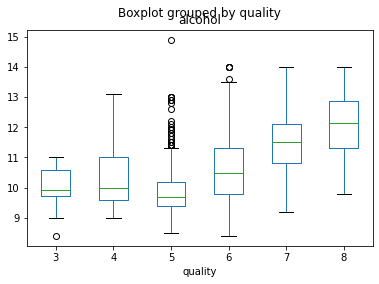

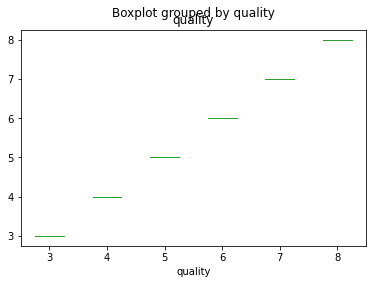

In [ ]:
for col in train_red_df.columns.values : #boxplot for visualizing red wine
    train_red_df.boxplot(by ='quality' ,column =col,grid = False)

In [ ]:
train_white_df.columns # to get all columns name

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


0     7.584333e-17
1     5.196832e-16
2     6.019639e-16
3    -1.024542e-16
4     6.482723e-17
5    -4.671641e-17
6     1.057636e-16
7     3.212112e-14
8    -1.203860e-15
9    -7.572999e-16
10   -2.178784e-15
dtype: float64


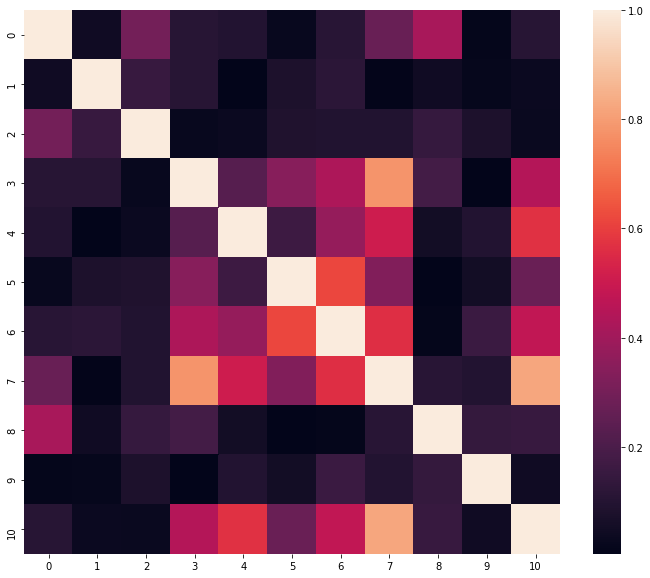

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#for white wine

#all columns except quality as have to predict
cols_to_retain = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
 
scaler.fit(train_white_df[cols_to_retain])
train_X = pd.DataFrame(scaler.transform(train_white_df[cols_to_retain]))
train_Y = pd.DataFrame(train_white_df['quality'])
display(train_X)
print(train_X.mean())
 
 
corrMatrix = train_X.corr(method ='spearman')
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix),annot=False)
plt.show()

In [ ]:
train_red_df.columns #columns name for retaining

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


0     3.435512e-16
1     1.699704e-16
2     4.335355e-16
3    -1.905223e-16
4     4.838739e-16
5     1.432042e-16
6     1.289532e-16
7     2.336509e-14
8     3.002879e-15
9     7.639596e-16
10    9.437243e-16
dtype: float64


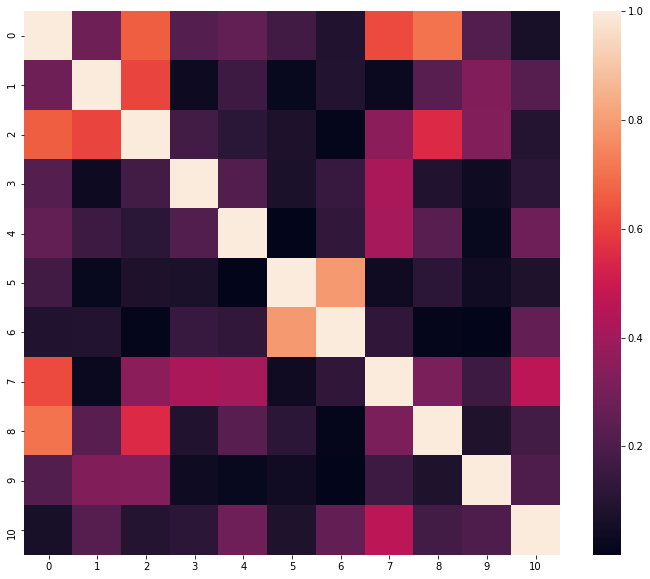

In [ ]:
#except quality all retain #sulphur dioxide hace correlation but in Q.1.e required to run on white models hence retained
cols_to_retain_new = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
#fitting and normalizing
scaler.fit(train_red_df[cols_to_retain_new])
train_P = pd.DataFrame(scaler.transform(train_red_df[cols_to_retain_new]))
train_Q = pd.DataFrame(train_red_df['quality'])
display(train_P)
print(train_P.mean())
 
 
corrMatrix_new = train_P.corr(method ='spearman')
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix_new),annot=False)
plt.show()


#models for white wine
information about models and their hyperparameters from :
https://scikit-learn.org/stable/model_selection.html

In [ ]:
import sklearn.model_selection as model_selection
X_train ,X_test ,y_train, y_test = model_selection.train_test_split(train_X,train_Y,train_size=0.67, random_state = 42) #splitting data for testing and training

#L1(Lasso) regularized linear model


In [ ]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report

lasso = linear_model.Lasso()
hyperparameters = {'alpha' : [0.1 , 1.0 , 1.1 , 1.2], 'max_iter' : [100,500,1000,5000], 'selection' : ['cyclic','random']}
clf = GridSearchCV(lasso, param_grid=hyperparameters)
clf.fit(np.array(X_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)

 
print('Test Classification  report')
y_true, y_pred = np.squeeze(y_test) , clf.predict(np.array(X_test))
print(explained_variance_score(y_true,y_pred))

Best parameters :
{'alpha': 0.1, 'max_iter': 100, 'selection': 'cyclic'}
Test Classification  report
0.21808860704266997


#comment on feature elemination
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero.
With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.

source : https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination

#model2 Ridge classifier

In [ ]:
lasso = linear_model.RidgeClassifier()
hyperparameters = {'alpha' : [0.1 , 1.0 , 1.1 , 1.2], 'max_iter' : [100,500,1000,5000], 'solver' : ['auto','cholesky','svd']}
scoring = 'f1_weighted'
clf = GridSearchCV(lasso, param_grid=hyperparameters,scoring=scoring)
clf.fit(np.array(X_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print('Best '+ scoring +" :" + str(clf.best_score_))
 
print('Test Classification  report')
y_true, y_pred = np.squeeze(y_test) , clf.predict(np.array(X_test))
print(explained_variance_score(y_true,y_pred))

Best parameters :
{'alpha': 0.1, 'max_iter': 100, 'solver': 'auto'}
Best f1_weighted :0.47058550493879503
Test Classification  report
0.15187335399187352


#model3  SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report

print('Training SVC using GridSearch')
scoring = "f1_weighted"
hyperparameters = {'kernel' : ['rbf','linear','poly','sigmoid'],'C':[0.1,1,5,10],'degree':[2,3,4,6]}
svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid = hyperparameters , scoring=scoring)
clf.fit(np.array(X_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print("Best " + scoring + " :" + str(clf.best_score_))
print('Test Classification report :')
y_true,y_pred = np.squeeze(y_test),clf.predict(np.array(X_test))
print(classification_report(y_true,y_pred))

Training SVC using GridSearch
Best parameters :
{'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best f1_weighted :0.5538219868666169
Test Classification report :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.36      0.22      0.27        46
           5       0.61      0.63      0.62       472
           6       0.58      0.70      0.63       731
           7       0.53      0.34      0.41       304
           8       0.42      0.14      0.21        57

    accuracy                           0.58      1617
   macro avg       0.42      0.34      0.36      1617
weighted avg       0.57      0.58      0.56      1617



#model4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
hyperparameters = {'max_depth' : [2,5,10,20],'n_estimators':[10,30,100]}
scoring= "f1_weighted"
clf = GridSearchCV(rfc,param_grid=hyperparameters,scoring=scoring)
clf.fit(np.array(X_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print('Best '+ scoring +" :" + str(clf.best_score_))
 
print('Test Classification  report')
y_true,y_pred = np.squeeze(y_test) , clf.predict(np.array(X_test))
print(classification_report(y_true,y_pred))


Best parameters :
{'max_depth': 20, 'n_estimators': 100}
Best f1_weighted :0.6373770491915114
Test Classification  report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.60      0.20      0.30        46
           5       0.69      0.71      0.70       472
           6       0.65      0.77      0.71       731
           7       0.72      0.52      0.61       304
           8       0.87      0.35      0.50        57

    accuracy                           0.67      1617
   macro avg       0.59      0.43      0.47      1617
weighted avg       0.68      0.67      0.66      1617



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model for red wine

In [ ]:
P_train ,P_test ,Q_train, Q_test = model_selection.train_test_split(train_P,train_Q,train_size=0.67, random_state = 42) #splitting data for testingand training

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#model1 L1 (Lasso)

In [ ]:
from sklearn import linear_model
lasso_red1 = linear_model.Lasso()
hyperparameters = {'alpha' : [0.1, 1.0 , 1.1 , 1.2, 1.5], 'max_iter' : [100,500,1000,5000], 'selection' : ['cyclic','random']}
lasso_red1 = GridSearchCV(lasso_red1, param_grid=hyperparameters)
lasso_red1.fit(np.array(P_train),np.squeeze(Q_train))
print('Best parameters :')
print(lasso_red1.best_params_)
print('Best '+ scoring +" :" + str(lasso_red1.best_score_))
 
print('Test Classification  report')
y_true, y_pred = np.squeeze(Q_test) , lasso_red1.predict(np.array(P_test))
print(explained_variance_score(y_true,y_pred))

Best parameters :
{'alpha': 0.1, 'max_iter': 5000, 'selection': 'random'}
Best f1_weighted :0.29411400398726456
Test Classification  report
0.2819108831106093


#model2 L2(Ridge)

In [ ]:
lasso_red = linear_model.RidgeClassifier()
hyperparameters = {'alpha' : [0.1 , 1.0 , 1.1 , 1.2], 'max_iter' : [100,500,1000,5000], 'solver' : ['auto','cholesky','svd']}
scoring = 'f1_weighted'
lasso_red = GridSearchCV(lasso_red, param_grid=hyperparameters,scoring=scoring)
lasso_red.fit(np.array(P_train),np.squeeze(Q_train))
print('Best parameters :')
print(lasso_red.best_params_)
print('Best '+ scoring +" :" + str(lasso_red.best_score_))
 
print('Test Classification  report')
y_true, y_pred = np.squeeze(Q_test) , lasso_red.predict(np.array(P_test))
print(explained_variance_score(y_true,y_pred))

Best parameters :
{'alpha': 0.1, 'max_iter': 100, 'solver': 'auto'}
Best f1_weighted :0.5439860300089945
Test Classification  report
0.23446699490312684


#model3 SVC

In [ ]:
print('Training SVC using GridSearch')
scoring = "f1_weighted"
hyperparameters = {'kernel' : ['rbf','linear','poly','sigmoid'],'C':[0.1,1,5,10],'degree':[2,3,4,6]}
svc_red = svm.SVC()
clf_red = GridSearchCV(estimator=svc,param_grid = hyperparameters , scoring=scoring)
clf_red.fit(np.array(P_train),np.squeeze(Q_train))
print('Best parameters :')
print(clf_red.best_params_)
print("Best " + scoring + " :" + str(clf_red.best_score_))
print('Test Classification report :')
y_true,y_pred = np.squeeze(Q_test),clf_red.predict(np.array(P_test))
print(classification_report(y_true,y_pred))

Training SVC using GridSearch
Best parameters :
{'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best f1_weighted :0.6099136771210663
Test Classification report :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.67      0.11      0.18        19
           5       0.68      0.76      0.72       217
           6       0.57      0.62      0.59       213
           7       0.52      0.37      0.43        70
           8       0.00      0.00      0.00         7

    accuracy                           0.61       528
   macro avg       0.41      0.31      0.32       528
weighted avg       0.60      0.61      0.60       528



#model4 Random forest

In [ ]:
rfc_red = RandomForestClassifier()
hyperparameters = {'max_depth' : [2,5,10,20],'n_estimators':[10,30,100]}
scoring= "f1_weighted"
rfc_red = GridSearchCV(rfc,param_grid=hyperparameters,scoring=scoring)
rfc_red.fit(np.array(P_train),np.squeeze(Q_train))
print('Best parameters :')
print(rfc_red.best_params_)
print('Best '+ scoring +" :" + str(rfc_red.best_score_))
 
print('Test Classification  report')
y_true,y_pred = np.squeeze(Q_test) , rfc_red.predict(np.array(P_test))
print(classification_report(y_true,y_pred))


Best parameters :
{'max_depth': 20, 'n_estimators': 100}
Best f1_weighted :0.6545609331095216
Test Classification  report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.73      0.77      0.75       217
           6       0.61      0.69      0.65       213
           7       0.52      0.40      0.45        70
           8       0.50      0.14      0.22         7

    accuracy                           0.65       528
   macro avg       0.39      0.34      0.35       528
weighted avg       0.62      0.65      0.63       528



#2e

#testing data from white on model for red wine and vice versa

In [ ]:
#model for red wine tested for white wine data
print('Training SVC using GridSearch')
scoring = "f1_weighted"
hyperparameters = {'kernel' : ['rbf','linear','poly','sigmoid'],'C':[0.1,1,5,10],'degree':[2,3,4,6]}
svc_red = svm.SVC()
clf_red = GridSearchCV(estimator=svc,param_grid = hyperparameters , scoring=scoring)
clf_red.fit(np.array(P_train),np.squeeze(Q_train))
print('Best parameters :')
print(clf_red.best_params_)
print("Best " + scoring + " :" + str(clf_red.best_score_))
print('Test Classification report :')
y_true,y_pred = np.squeeze(y_test),clf_red.predict(np.array(X_test))
print(classification_report(y_true,y_pred))

Training SVC using GridSearch
Best parameters :
{'C': 10, 'degree': 2, 'kernel': 'rbf'}
Best f1_weighted :0.6099136771210663
Test Classification report :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.13      0.19        46
           5       0.41      0.72      0.52       472
           6       0.50      0.48      0.49       731
           7       0.41      0.08      0.13       304
           8       0.00      0.00      0.00        57

    accuracy                           0.45      1617
   macro avg       0.28      0.23      0.22      1617
weighted avg       0.43      0.45      0.40      1617



In [ ]:
#model for white wine tested for red wine
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
hyperparameters = {'max_depth' : [2,5,10,20],'n_estimators':[10,30,100]}
scoring= "f1_weighted"
clf = GridSearchCV(rfc,param_grid=hyperparameters,scoring=scoring)
clf.fit(np.array(X_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print('Best '+ scoring +" :" + str(clf.best_score_))
 
print('Test Classification  report')
y_true,y_pred = np.squeeze(Q_test) , clf.predict(np.array(P_test))
print(classification_report(y_true,y_pred))


Best parameters :
{'max_depth': 20, 'n_estimators': 100}
Best f1_weighted :0.6286832599838689
Test Classification  report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.63      0.43      0.51       217
           6       0.44      0.70      0.54       213
           7       0.15      0.09      0.11        70
           8       0.00      0.00      0.00         7

    accuracy                           0.47       528
   macro avg       0.20      0.20      0.19       528
weighted avg       0.46      0.47      0.45       528



After testing model for white wine on data from red wine and vice versa the accuracy was found to be reduced in both the cases.